In [1]:
pwd

'/home/jtl/Documents/shenhao/media_lab_south_Australia/code'

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
import geoplot

In [5]:
# read data

### flow
flow_df = pd.read_csv("../data/flows_sa2_months_2018-02-01.csv")
print("flow shape:", flow_df.shape)
print(flow_df.head(10))
print()

### transaction 1
trans_age_df = pd.read_csv("../data/transaction_age_bins.csv")
print("trans_age_df: ", trans_age_df.shape)
print(trans_age_df.head(10))
print()

### transaction 2
trans_mcc_df = pd.read_csv("../data/transaction_mcc.csv")
print("trans_mcc_df: ", trans_mcc_df.shape)
print(trans_mcc_df.head(10))
print()

# Change sa2 values to string
flow_df['sa2'] = flow_df.sa2.astype(str)
flow_df['agent_home_sa2'] = [x[:-2] for x in flow_df['agent_home_sa2'].astype(str)]

trans_age_df['source_sa2'] = trans_age_df['source_sa2'].astype(str)
trans_age_df['target_sa2'] = trans_age_df['target_sa2'].astype(str)

trans_mcc_df['source_sa2'] = trans_mcc_df['source_sa2'].astype(str)
trans_mcc_df['target_sa2'] = trans_mcc_df['target_sa2'].astype(str)


flow shape: (21415, 7)
                       timestamp        sa2  state  agent_home_sa2  \
0  2018-02-01T00:00:00.000+11:00  401011001      4     101021011.0   
1  2018-02-01T00:00:00.000+11:00  404031104      4     101021011.0   
2  2018-02-01T00:00:00.000+11:00  401011001      4     101021012.0   
3  2018-02-01T00:00:00.000+11:00  404031104      4     101021012.0   
4  2018-02-01T00:00:00.000+11:00  406011130      4     101041025.0   
5  2018-02-01T00:00:00.000+11:00  401011001      4     101051539.0   
6  2018-02-01T00:00:00.000+11:00  404031104      4     101051539.0   
7  2018-02-01T00:00:00.000+11:00  404031104      4     101061542.0   
8  2018-02-01T00:00:00.000+11:00  403041073      4     101061544.0   
9  2018-02-01T00:00:00.000+11:00  403041074      4     101061544.0   

   unique_agents  sum_stay_duration  total_stays  
0             80              76375          354  
1            107               6875          175  
2             55             111478          449  
3 

In [6]:
# Shapes
print("flow shape:", flow_df.shape)
print("trans_age_df: ", trans_age_df.shape)
print("trans_mcc_df: ", trans_mcc_df.shape)

flow shape: (21415, 7)
trans_age_df:  (32953, 5)
trans_mcc_df:  (35705, 5)


In [7]:
# describe
print(flow_df.describe())
print(flow_df.dtypes)

print(trans_age_df.describe())
print(trans_age_df.dtypes)

print(trans_mcc_df.describe())
print(trans_mcc_df.dtypes)

         state  unique_agents  sum_stay_duration    total_stays
count  21415.0   21415.000000       2.141500e+04   21415.000000
mean       4.0     749.068363       1.786178e+06    4675.726920
std        0.0    1734.225938       1.562408e+07   27030.787039
min        4.0      40.000000       6.000000e+02      40.000000
25%        4.0      80.000000       3.719750e+04     205.000000
50%        4.0     188.000000       1.156580e+05     527.000000
75%        4.0     583.500000       3.421750e+05    1672.500000
max        4.0   30950.000000       4.805079e+08  741635.000000
timestamp            object
sa2                  object
state                 int64
agent_home_sa2       object
unique_agents         int64
sum_stay_duration     int64
total_stays           int64
dtype: object
              count        amount
count  32953.000000  32953.000000
mean     829.524505   7552.697296
std      422.386666   4285.719294
min       10.000000    150.000000
25%      491.000000   3842.000000
50%      8

In [8]:
# check a few columns' info
# Note: total number of SA2 in South Australia is 172.
# Many residents' locations from the credit card data are outside South Australia region.
print("--- number of sa2 in flow_df ---")
print("Flow SA2", len(np.unique(flow_df.sa2, return_counts = True)[0])) # 
print(np.unique(flow_df.sa2, return_counts = True)) # 
print()
print("Agent home SA2", len(np.unique(flow_df.agent_home_sa2, return_counts = True)[0])) # 
print(np.unique(flow_df.agent_home_sa2, return_counts = True)) # 
print()

print("--- sa2 in trans_age_df ---")
print("Source sa2", len(np.unique(trans_age_df.source_sa2, return_counts = True)[0])) # 
print(np.unique(trans_age_df.source_sa2, return_counts = True)) # 
print()
print("Target sa2", len(np.unique(trans_age_df.target_sa2, return_counts = True)[0])) # 
print(np.unique(trans_age_df.target_sa2, return_counts = True)) # 
print()

print("--- sa2 in trans_mcc_df ---")
print("Source sa2", len(np.unique(trans_mcc_df.source_sa2, return_counts = True)[0])) # 
print(np.unique(trans_mcc_df.source_sa2, return_counts = True)) # 
print()
print("Target sa2", len(np.unique(trans_mcc_df.target_sa2, return_counts = True)[0])) # 
print(np.unique(trans_mcc_df.target_sa2, return_counts = True)) # 
print()

print("--- activity types in trans_mcc_df ---")
print(np.unique(trans_mcc_df.mcc, return_counts = True)) # it is activity types.
print()

# Q: what are the 'Cell Size Limit', 'OUTST', and 'nan'? Can I just drop the values?

--- number of sa2 in flow_df ---
Flow SA2 170
(array(['401011001', '401011002', '401021003', '401021004', '401021005',
       '401021006', '401021007', '401021008', '401021009', '401021010',
       '401031011', '401031012', '401031013', '401041014', '401041015',
       '401041016', '401051017', '401051018', '401051019', '401061020',
       '401061021', '401061022', '401071023', '401071024', '402011025',
       '402011026', '402011027', '402021028', '402021029', '402021030',
       '402021031', '402021032', '402021033', '402021034', '402021035',
       '402031036', '402031037', '402031038', '402041039', '402041040',
       '402041041', '402041042', '402041043', '402041044', '402041046',
       '402041047', '402041048', '402041171', '402041172', '402051049',
       '402051050', '402051051', '402051052', '402051053', '402051054',
       '402051055', '403011056', '403011057', '403021058', '403021059',
       '403021060', '403021061', '403021062', '403021063', '403021064',
       '403031065

Source sa2 165
(array(['401011001', '401011002', '401021003', '401021004', '401021005',
       '401021006', '401021007', '401021008', '401021009', '401021010',
       '401031011', '401031012', '401031013', '401041014', '401041015',
       '401041016', '401051017', '401051018', '401051019', '401061020',
       '401061021', '401061022', '401071023', '401071024', '402011025',
       '402011026', '402011027', '402021028', '402021029', '402021030',
       '402021031', '402021032', '402021033', '402021034', '402021035',
       '402031036', '402031037', '402031038', '402041040', '402041041',
       '402041043', '402041044', '402041046', '402041047', '402041048',
       '402041171', '402041172', '402051049', '402051050', '402051051',
       '402051052', '402051053', '402051054', '402051055', '403011056',
       '403011057', '403021058', '403021059', '403021060', '403021061',
       '403021062', '403021063', '403021064', '403031065', '403031066',
       '403031067', '403031068', '403031069', '4

# Process Three Dataframes

In [9]:
# flow_df
# Remove the agents whose home are outside South Australia
south_australia_sa4_set = ['401','402','403','404','405','406','407']
flow_df = flow_df.loc[np.array([x[:3] in south_australia_sa4_set for x in flow_df.agent_home_sa2])]
flow_df

,timestamp,sa2,state,agent_home_sa2,unique_agents,sum_stay_duration,total_stays
1716,2018-02-01T00:00:00.000+11:00,401011001,4,401011001,19863,268779414,681217
1717,2018-02-01T00:00:00.000+11:00,401011002,4,401011001,6911,4857456,29322
1718,2018-02-01T00:00:00.000+11:00,401021003,4,401011001,404,253764,1334
1719,2018-02-01T00:00:00.000+11:00,401021004,4,401011001,1184,903377,5487
1720,2018-02-01T00:00:00.000+11:00,401021005,4,401011001,700,189721,1278
...,...,...,...,...,...,...,...
20800,2018-02-01T00:00:00.000+11:00,407031166,4,407031170,217,217437,499
20801,2018-02-01T00:00:00.000+11:00,407031167,4,407031170,945,353528,2096
20802,2018-02-01T00:00:00.000+11:00,407031168,4,407031170,580,285362,1599
20803,2018-02-01T00:00:00.000+11:00,407031169,4,407031170,50,3769,93


In [10]:
# edit trans_age_df
# remove the invalide values in source_sa2 and target_sa2
invalid_value_list = ['Cell Size Limit', 'nan', 'OUTST']
trans_age_df=trans_age_df.loc[~trans_age_df.source_sa2.isin(invalid_value_list)]
trans_age_df=trans_age_df.loc[~trans_age_df.target_sa2.isin(invalid_value_list)]
trans_age_df

,source_sa2,target_sa2,count,amount,age_bin
0,401011001,401011001,192,9903,18-29
1,401011001,401011001,1368,6733,30-39
2,401011001,401011001,1131,4741,40-49
3,401011001,401011001,1145,6021,50-59
4,401011001,401011001,839,3149,60-69
...,...,...,...,...,...
29710,407031170,407031170,804,3891,30-39
29711,407031170,407031170,956,6350,40-49
29712,407031170,407031170,945,6545,50-59
29713,407031170,407031170,738,5061,60-69


In [11]:
# edit trans_mcc_df
# remove the invalide values in source_sa2 and target_sa2
invalid_value_list = ['Cell Size Limit', 'nan', 'OUTST']
trans_mcc_df=trans_mcc_df.loc[~trans_mcc_df.source_sa2.isin(invalid_value_list)]
trans_mcc_df=trans_mcc_df.loc[~trans_mcc_df.target_sa2.isin(invalid_value_list)]
trans_mcc_df

,source_sa2,target_sa2,count,amount,mcc
0,401011001,401011001,4768,6465,Apparel Discount and Department Stores
1,401011001,401011001,1494,11828,Auto and Transportation
2,401011001,401011001,594,7519,Dining Sports and Entertainment
3,401011001,401011001,676,3536,Hardware Supplies and Homewares
4,401011001,401011001,3058,4553,Luxury and Speciality Stores
...,...,...,...,...,...
30927,407031170,407031170,172,9616,Luxury and Speciality Stores
30928,407031170,407031170,1056,14457,Medical and Personal Care
30929,407031170,407031170,5362,14802,Personal Services
30930,407031170,407031170,259,12196,Retail Food Grocery and Supermarkets


#### save cleaned files

In [12]:
trans_mcc_df.to_pickle("../data_process/trans_mcc_df.pkl")

In [13]:
trans_age_df.to_pickle("../data_process/trans_age_df.pkl")

In [14]:
flow_df.to_pickle("../data_process/flow_df.pkl")

# Spatial visualization

In [15]:
# Read SA2
sa2_shape = gpd.read_file("../data/sa2/SA2_2016_AUST.shp")

In [16]:
sa2_shape.dtypes

SA2_MAIN16      object
SA2_5DIG16      object
SA2_NAME16      object
SA3_CODE16      object
SA3_NAME16      object
SA4_CODE16      object
SA4_NAME16      object
GCC_CODE16      object
GCC_NAME16      object
STE_CODE16      object
STE_NAME16      object
AREASQKM16     float64
geometry      geometry
dtype: object

In [17]:
# Basic info of sa2 for the whole Australia
# sa2 shapefile is quite self-explainary. 
# It includes the names and ids of sa2, sa3, and sa4 areas.
print(type(sa2_shape))
print(sa2_shape.head(10))
print(sa2_shape.dtypes)

<class 'geopandas.geodataframe.GeoDataFrame'>
  SA2_MAIN16 SA2_5DIG16                       SA2_NAME16 SA3_CODE16  \
0  101021007      11007                        Braidwood      10102   
1  101021008      11008                          Karabar      10102   
2  101021009      11009                       Queanbeyan      10102   
3  101021010      11010                Queanbeyan - East      10102   
4  101021011      11011                Queanbeyan Region      10102   
5  101021012      11012  Queanbeyan West - Jerrabomberra      10102   
6  101031013      11013                          Bombala      10103   
7  101031014      11014                            Cooma      10103   
8  101031015      11015                     Cooma Region      10103   
9  101031016      11016            Jindabyne - Berridale      10103   

        SA3_NAME16 SA4_CODE16      SA4_NAME16 GCC_CODE16   GCC_NAME16  \
0       Queanbeyan        101  Capital Region      1RNSW  Rest of NSW   
1       Queanbeyan        

In [18]:
# Keep only South Australia area.
# Info: file:///Users/shenhaowang/Downloads/StatePublicHealthPlan_Final.pdf
# Note: Based on the info above, South Australia has 7 SA4 regions.
south_australia_sa4_set = ['401','402','403','404','405','406','407']
sa2_south_au = sa2_shape.loc[sa2_shape.SA4_CODE16.isin(south_australia_sa4_set)]
print(sa2_south_au.shape) # 172 SA2 regions are left.
print(sa2_south_au.head(10))

(172, 13)
     SA2_MAIN16 SA2_5DIG16            SA2_NAME16 SA3_CODE16      SA3_NAME16  \
1572  401011001      41001              Adelaide      40101   Adelaide City   
1573  401011002      41002        North Adelaide      40101   Adelaide City   
1574  401021003      41003        Adelaide Hills      40102  Adelaide Hills   
1575  401021004      41004    Aldgate - Stirling      40102  Adelaide Hills   
1576  401021005      41005    Hahndorf - Echunga      40102  Adelaide Hills   
1577  401021006      41006   Lobethal - Woodside      40102  Adelaide Hills   
1578  401021007      41007          Mount Barker      40102  Adelaide Hills   
1579  401021008      41008   Mount Barker Region      40102  Adelaide Hills   
1580  401021009      41009                Nairne      40102  Adelaide Hills   
1581  401021010      41010  Uraidla - Summertown      40102  Adelaide Hills   

     SA4_CODE16                    SA4_NAME16 GCC_CODE16        GCC_NAME16  \
1572        401  Adelaide - Central and Hi

<AxesSubplot:>

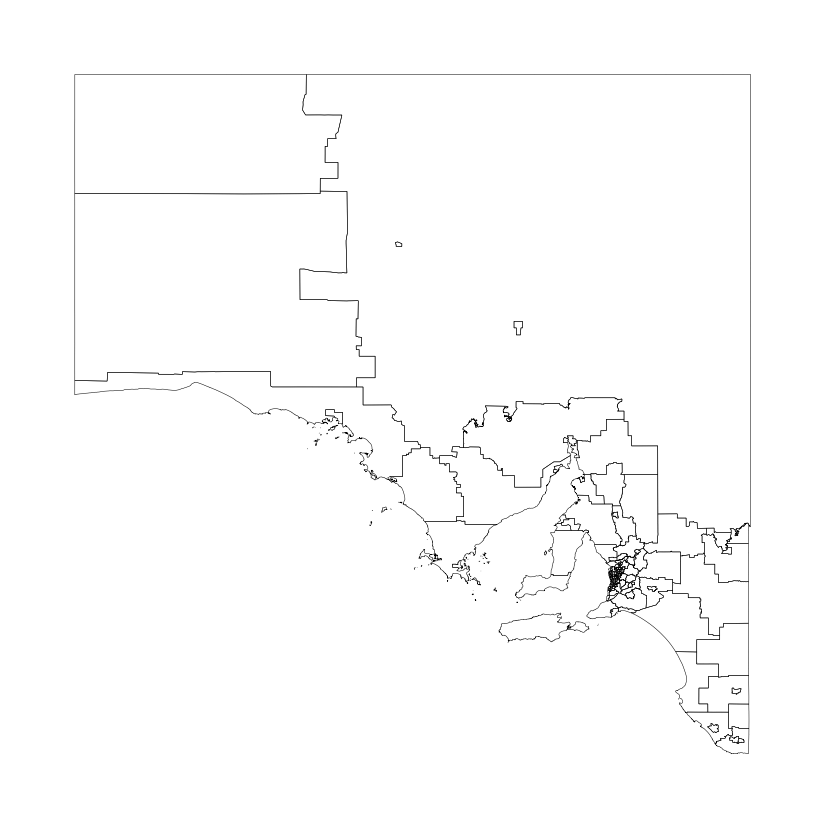

In [19]:
# SA area
geoplot.polyplot(sa2_south_au, 
                 edgecolor = 'black', 
                 linewidth = 0.5,
                 figsize = (15,15))

In [20]:
# group vars
#
flow_source_sa2_group = flow_df.groupby(by=["agent_home_sa2"]).sum()
flow_target_sa2_group = flow_df.groupby(by=["sa2"]).sum()
flow_source_sa2_group['o_sa2'] = flow_source_sa2_group.index
flow_target_sa2_group['d_sa2'] = flow_target_sa2_group.index
flow_source_sa2_group.columns = ['state', 'unique_agents_home_based', 
                                 'sum_stay_duration_home_based',
                                 'total_stays_home_based', 'o_sa2']
flow_target_sa2_group.columns = ['state', 'unique_agents_d_based', 
                                 'sum_stay_duration_d_based',
                                 'total_stays_d_based', 'd_sa2']
print(flow_source_sa2_group.head(5))
print(flow_target_sa2_group.head(5))

#
trans_age_source_sa2_group = trans_age_df.groupby(by = ['source_sa2']).sum()
trans_age_target_sa2_group = trans_age_df.groupby(by = ['target_sa2']).sum()
trans_age_source_sa2_group['o_sa2'] = trans_age_source_sa2_group.index
trans_age_target_sa2_group['d_sa2'] = trans_age_target_sa2_group.index
trans_age_source_sa2_group.columns = ['count_credit_o_from_age_file', 'amount_credit_o_from_age_file', 'o_sa2']
trans_age_target_sa2_group.columns = ['count_credit_d_from_age_file', 'amount_credit_d_from_age_file', 'd_sa2']
print(trans_age_source_sa2_group.head(5))
print(trans_age_target_sa2_group.head(5))

#
trans_mcc_source_sa2_group = trans_mcc_df.groupby(by = ['source_sa2']).sum()
trans_mcc_target_sa2_group = trans_mcc_df.groupby(by = ['target_sa2']).sum()
trans_mcc_source_sa2_group['o_sa2'] = trans_mcc_source_sa2_group.index
trans_mcc_target_sa2_group['d_sa2'] = trans_mcc_target_sa2_group.index
trans_mcc_source_sa2_group.columns = ['count_credit_o_from_mcc_file', 'amount_credit_o_from_mcc_file', 'o_sa2']
trans_mcc_target_sa2_group.columns = ['count_credit_o_from_mcc_file', 'amount_credit_o_from_mcc_file', 'd_sa2']
print(trans_mcc_source_sa2_group.head(5))
print(trans_mcc_target_sa2_group.head(5))

                state  unique_agents_home_based  sum_stay_duration_home_based  \
agent_home_sa2                                                                  
401011001         580                    149775                     363030268   
401011002         520                     76947                     169893683   
401021003         516                     68608                     154249351   
401021004         576                    169271                     373258981   
401021005         452                     41880                      94708375   

                total_stays_home_based      o_sa2  
agent_home_sa2                                     
401011001                      1161191  401011001  
401011002                       520850  401011002  
401021003                       421177  401021003  
401021004                      1103391  401021004  
401021005                       296571  401021005  
           state  unique_agents_d_based  sum_stay_duration_d_based  

In [21]:
# merge
#
sa2_south_au_info = sa2_south_au.merge(flow_source_sa2_group, left_on = 'SA2_MAIN16', right_on = 'o_sa2', how = 'outer')
sa2_south_au_info = sa2_south_au_info.merge(flow_target_sa2_group, left_on = 'SA2_MAIN16', right_on = 'd_sa2', how = 'outer')

# 
sa2_south_au_info=sa2_south_au_info.merge(trans_age_source_sa2_group, left_on = 'SA2_MAIN16', right_on = 'o_sa2', how = 'outer')
sa2_south_au_info=sa2_south_au_info.merge(trans_age_target_sa2_group, left_on = 'SA2_MAIN16', right_on = 'd_sa2', how = 'outer')

sa2_south_au_info=sa2_south_au_info.merge(trans_mcc_source_sa2_group, left_on = 'SA2_MAIN16', right_on = 'o_sa2', how = 'outer')
sa2_south_au_info=sa2_south_au_info.merge(trans_mcc_target_sa2_group, left_on = 'SA2_MAIN16', right_on = 'd_sa2', how = 'outer')

sa2_south_au_info

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,...,o_sa2_y,count_credit_d_from_age_file,amount_credit_d_from_age_file,d_sa2_y,count_credit_o_from_mcc_file_x,amount_credit_o_from_mcc_file_x,o_sa2,count_credit_o_from_mcc_file_y,amount_credit_o_from_mcc_file_y,d_sa2
0,401011001,41001,Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,401011001,718529.0,7830167.0,401011001,834879.0,2071359.0,401011001,4184250.0,10495162.0,401011001
1,401011002,41002,North Adelaide,40101,Adelaide City,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,401011002,402923.0,4396368.0,401011002,616005.0,1367076.0,401011002,1555982.0,3336325.0,401011002
2,401021003,41003,Adelaide Hills,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,401021003,50559.0,359292.0,401021003,589789.0,1354375.0,401021003,208377.0,371817.0,401021003
3,401021004,41004,Aldgate - Stirling,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,401021004,211466.0,1727605.0,401021004,1174019.0,2507444.0,401021004,814698.0,1664288.0,401021004
4,401021005,41005,Hahndorf - Echunga,40102,Adelaide Hills,401,Adelaide - Central and Hills,4GADE,Greater Adelaide,4,...,401021005,83888.0,587091.0,401021005,306498.0,688529.0,401021005,504505.0,868263.0,401021005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,407031166,41166,Murray Bridge Region,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,...,407031166,35476.0,369904.0,407031166,146755.0,298921.0,407031166,106718.0,320975.0,407031166
168,407031167,41167,Renmark,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,...,407031167,56032.0,515789.0,407031167,181854.0,455902.0,407031167,235043.0,639758.0,407031167
169,407031168,41168,Renmark Region,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,...,407031168,30482.0,267452.0,407031168,172715.0,441897.0,407031168,116995.0,249350.0,407031168
170,407031169,41169,The Coorong,40703,Murray and Mallee,407,South Australia - South East,4RSAU,Rest of SA,4,...,407031169,84541.0,908216.0,407031169,221909.0,519120.0,407031169,460494.0,1035435.0,407031169


In [22]:
print(sa2_south_au_info.columns)

Index(['SA2_MAIN16', 'SA2_5DIG16', 'SA2_NAME16', 'SA3_CODE16', 'SA3_NAME16',
       'SA4_CODE16', 'SA4_NAME16', 'GCC_CODE16', 'GCC_NAME16', 'STE_CODE16',
       'STE_NAME16', 'AREASQKM16', 'geometry', 'state_x',
       'unique_agents_home_based', 'sum_stay_duration_home_based',
       'total_stays_home_based', 'o_sa2_x', 'state_y', 'unique_agents_d_based',
       'sum_stay_duration_d_based', 'total_stays_d_based', 'd_sa2_x',
       'count_credit_o_from_age_file', 'amount_credit_o_from_age_file',
       'o_sa2_y', 'count_credit_d_from_age_file',
       'amount_credit_d_from_age_file', 'd_sa2_y',
       'count_credit_o_from_mcc_file_x', 'amount_credit_o_from_mcc_file_x',
       'o_sa2', 'count_credit_o_from_mcc_file_y',
       'amount_credit_o_from_mcc_file_y', 'd_sa2'],
      dtype='object')


Visualize counts of credit card usage for destination and origin locations


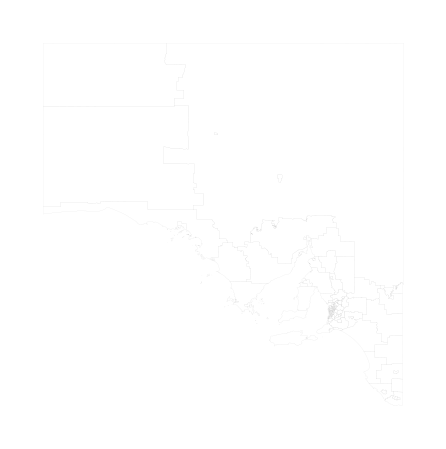

In [24]:
# visualize counts of credit card usage for destination and origin locations from the age file.
print("Visualize counts of credit card usage for destination and origin locations")

ax = geoplot.polyplot(sa2_south_au, 
                 edgecolor = 'black', 
                 linewidth = 0.02,
                 figsize = (8,8))

ax.set_title("Counts of credit card usage in destination locations", fontsize=16)

geoplot.choropleth(sa2_south_au_info,
                   hue = sa2_south_au_info['count_credit_d_from_age_file'],
                   edgecolor = 'black', 
                   linewidth = 0.02,                 
                   ax = ax,
                   cmap='Greens')

<AxesSubplot:title={'center':'Counts of credit card usage in origin locations'}>

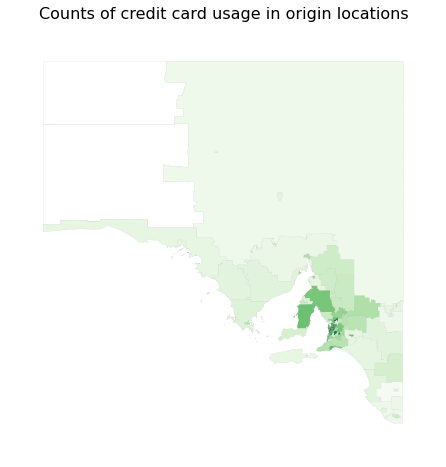

In [24]:
# 
ax = geoplot.polyplot(sa2_south_au, 
                 edgecolor = 'black', 
                 linewidth = 0.02,
                 figsize = (8,8))

ax.set_title("Counts of credit card usage in origin locations", fontsize=16)

geoplot.choropleth(sa2_south_au_info,
                   hue = sa2_south_au_info['count_credit_o_from_age_file'],
                   edgecolor = 'black', 
                   linewidth = 0.02,                 
                   ax = ax,
                   cmap='Greens')

In [37]:
import folium

In [36]:
import networkx

## Build network

## Baseline gravity model

Key question: what are the inputs and outputs? 